In [24]:
import pandas as pd
pd.set_option('display.max_rows', 15)  # 모든 행을 출력하도록 설정
pd.options.mode.chained_assignment = None 
import warnings
warnings.filterwarnings('ignore') # 경고 메세지 OFF

In [2]:
Bloomberg = pd.read_csv('/home/user/exercise_j/TwitterXAPI/BloombergCrypto_classified.csv')
Gavin = pd.read_csv('/home/user/exercise_j/TwitterXAPI/GavinWood_classified.csv')
Timbeiko = pd.read_csv('/home/user/exercise_j/TwitterXAPI/timbeiko_eth_classified.csv')
Arthur = pd.read_csv('/home/user/exercise_j/TwitterXAPI/ArthurHayes_classified.csv')
Jesse = pd.read_csv('/home/user/exercise_j/TwitterXAPI/JesseEckel_classified.csv')

In [3]:
df = pd.concat([Bloomberg,Gavin,Timbeiko,Arthur,Jesse], axis=0)

# 인덱스 재설정 (필요한 경우)
df.reset_index(drop=True, inplace=True)

df

,created_at,text,ticker,sentiment_score
0,2024-01-05T09:23:30.000Z,RT @RChoongWilkins: All of this happened in Ch...,NaN,NaN
1,2024-01-05T09:00:12.000Z,Nigeria’s central bank releases guidelines for...,NaN,NaN
2,2024-01-05T08:00:12.000Z,Turkey's president has appointed crypto asset ...,ticker,0.0
3,2024-01-05T07:00:10.000Z,MicroStrategy co-founder Michael Saylor is sel...,BTC,-0.5
4,2024-01-05T06:00:08.000Z,Crypto wallet-maker Ledger says it will cover ...,NaN,NaN
...,...,...,...,...
9881,2021-10-22T20:22:43.000Z,@NiftyPhoebe @Strongblock_io @WithoutTheRope T...,NaN,0.0
9882,2021-10-22T20:11:12.000Z,@NiftyPhoebe @Strongblock_io @WithoutTheRope H...,NFTY,0.0
9883,2021-09-14T14:13:32.000Z,@Tripkebab @PancakeSwap This made me laugh😂,NaN,NaN
9884,2021-09-14T12:56:43.000Z,@PancakeSwap 8 Days away does anyone know what...,NaN,NaN


In [4]:
df = df.dropna(subset=['sentiment_score', 'ticker'])

# 'created_at' 열을 날짜 형식으로 변환
df['created_at'] = pd.to_datetime(df['created_at']).dt.strftime('%Y-%m-%d')
df['ticker'] = df['ticker'].str.replace('"', '')

# 결과 출력
print(df)

      created_at                                               text  ticker  \
2     2024-01-05  Turkey's president has appointed crypto asset ...  ticker   
3     2024-01-05  MicroStrategy co-founder Michael Saylor is sel...     BTC   
5     2024-01-05  Grayscale CEO Michael Sonnenshein said the US ...     BTC   
6     2024-01-05  BlackRock named Jane Street and JPMorgan as th...     BTC   
9     2024-01-05  If approved, a spot Bitcoin ETF will draw pens...     BTC   
...          ...                                                ...     ...   
9874  2021-11-23  @ultrasoundEdik @romedaofinance I was thinking...    ROME   
9877  2021-11-22                 @juspect0x @romedaofinance I wish😭     ROM   
9878  2021-11-22  @_Mr__S__ @romedaofinance That’s soo good🙌🏻 Do...     RMD   
9879  2021-11-22  @jofnosso @romedaofinance It just looks like a...     TRX   
9882  2021-10-22  @NiftyPhoebe @Strongblock_io @WithoutTheRope H...    NFTY   

      sentiment_score  
2                0.00  
3  

In [5]:
df['ticker'] = df['ticker'].str.replace('FTX', 'FTT')
# pd.set_option('display.max_rows', None)  # 모든 행을 출력하도록 설정
ticker_counts = df['ticker'].value_counts()
print(ticker_counts)

ticker
ETH       2449
ticker    1523
BTC       1097
SOL        748
DOT        416
          ... 
RMD          1
ZIPMEX       1
-            1
OKX          1
GEM          1
Name: count, Length: 265, dtype: int64


#### 10개 이상의 트윗이 있는 티커 구분

In [6]:
tickers_to_keep = ticker_counts[ticker_counts > 9].index

# 해당하는 'ticker' 값만을 가진 행들을 유지
df_filtered = df[df['ticker'].isin(tickers_to_keep)]

# 결과 출력
ticker_counts2 = df_filtered['ticker'].value_counts()
print(ticker_counts2)

ticker
ETH       2449
ticker    1523
BTC       1097
SOL        748
DOT        416
          ... 
SBF         12
TON         10
USDT        10
GBTC        10
KSM         10
Name: count, Length: 25, dtype: int64


In [7]:
df_filtered = df_filtered[~df_filtered['ticker'].isin(['','ticker','LUNA','COIN','NFT','N/A','GMX','USDC','SBF','USDT','GBTC','KSM'])]
# df_filtered = df_filtered.reset_index(drop=True, inplace=True)
ticker_counts2 = df_filtered['ticker'].value_counts()
print(ticker_counts2)

ticker
ETH      2449
BTC      1097
SOL       748
DOT       416
BNB       158
FTT       128
MATIC      35
UNI        31
XRP        31
TRX        13
DOGE       13
LINK       13
TON        10
Name: count, dtype: int64


In [8]:
df_filtered 

,created_at,text,ticker,sentiment_score
3,2024-01-05,MicroStrategy co-founder Michael Saylor is sel...,BTC,-0.50
5,2024-01-05,Grayscale CEO Michael Sonnenshein said the US ...,BTC,0.00
6,2024-01-05,BlackRock named Jane Street and JPMorgan as th...,BTC,0.25
9,2024-01-05,"If approved, a spot Bitcoin ETF will draw pens...",BTC,0.50
10,2024-01-04,An ETF startup is trying to launch a Bitcoin f...,BTC,0.00
...,...,...,...,...
9825,2022-05-01,Unpopular opinion: Kylo Ren should’ve been the...,BTC,0.00
9826,2022-05-01,Project under 100 million marketcap that you ...,BTC,0.00
9830,2022-04-29,@simsalacrypto Really? I think people will fom...,ETH,0.80
9831,2022-04-29,Will Ethereum 2.0 upgrade kick off the next bu...,ETH,0.75


In [9]:
a = df_filtered.reset_index(drop=True)
print(a)

      created_at                                               text ticker  \
0     2024-01-05  MicroStrategy co-founder Michael Saylor is sel...    BTC   
1     2024-01-05  Grayscale CEO Michael Sonnenshein said the US ...    BTC   
2     2024-01-05  BlackRock named Jane Street and JPMorgan as th...    BTC   
3     2024-01-05  If approved, a spot Bitcoin ETF will draw pens...    BTC   
4     2024-01-04  An ETF startup is trying to launch a Bitcoin f...    BTC   
...          ...                                                ...    ...   
5137  2022-05-01  Unpopular opinion: Kylo Ren should’ve been the...    BTC   
5138  2022-05-01  Project under 100 million marketcap  that you ...    BTC   
5139  2022-04-29  @simsalacrypto Really? I think people will fom...    ETH   
5140  2022-04-29  Will Ethereum 2.0 upgrade kick off the next bu...    ETH   
5141  2021-11-22  @jofnosso @romedaofinance It just looks like a...    TRX   

      sentiment_score  
0               -0.50  
1              

#### 데이터 분포 시계열 시각화

In [10]:
import matplotlib.pyplot as plt

In [11]:
print(ticker_counts2)

ticker
ETH      2449
BTC      1097
SOL       748
DOT       416
BNB       158
FTT       128
MATIC      35
UNI        31
XRP        31
TRX        13
DOGE       13
LINK       13
TON        10
Name: count, dtype: int64


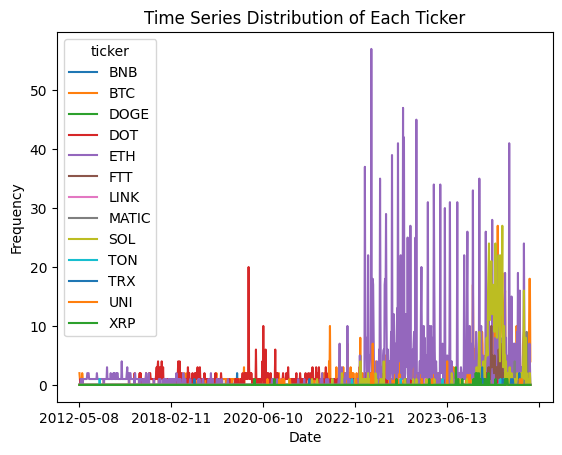

In [12]:
df_grouped = df_filtered.groupby(['ticker', 'created_at']).size().unstack(fill_value=0)

# 시계열 그래프 그리기
df_grouped.T.plot(kind='line') # 'bar'는 막대 그래프, 'line'은 선 그래프
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Time Series Distribution of Each Ticker')
plt.show()

#### 100개 이상의 트윗으로 다시 정리

In [13]:
df_filtered2 = df_filtered[~df_filtered['ticker'].isin(['','MATIC','UNI','XRP','TRX','DOGE','LINK','TON','LUNA','COIN','NFT','N/A','GMX','USDC','SBF','USDT','GBTC','KSM'])]
# df_filtered = df_filtered.reset_index(drop=True, inplace=True)
ticker_counts3 = df_filtered2['ticker'].value_counts()
print(ticker_counts3)

ticker
ETH    2449
BTC    1097
SOL     748
DOT     416
BNB     158
FTT     128
Name: count, dtype: int64


In [54]:
b = df_filtered2.reset_index(drop=True)
b.to_csv('Final_Crypto_data.csv',index=False)
print(b)

     created_at                                               text ticker  \
0    2024-01-05  MicroStrategy co-founder Michael Saylor is sel...    BTC   
1    2024-01-05  Grayscale CEO Michael Sonnenshein said the US ...    BTC   
2    2024-01-05  BlackRock named Jane Street and JPMorgan as th...    BTC   
3    2024-01-05  If approved, a spot Bitcoin ETF will draw pens...    BTC   
4    2024-01-04  An ETF startup is trying to launch a Bitcoin f...    BTC   
...         ...                                                ...    ...   
4991 2022-05-03  What good long term projects are making you th...    BTC   
4992 2022-05-01  Unpopular opinion: Kylo Ren should’ve been the...    BTC   
4993 2022-05-01  Project under 100 million marketcap  that you ...    BTC   
4994 2022-04-29  @simsalacrypto Really? I think people will fom...    ETH   
4995 2022-04-29  Will Ethereum 2.0 upgrade kick off the next bu...    ETH   

      sentiment_score  
0               -0.50  
1                0.00  
2  

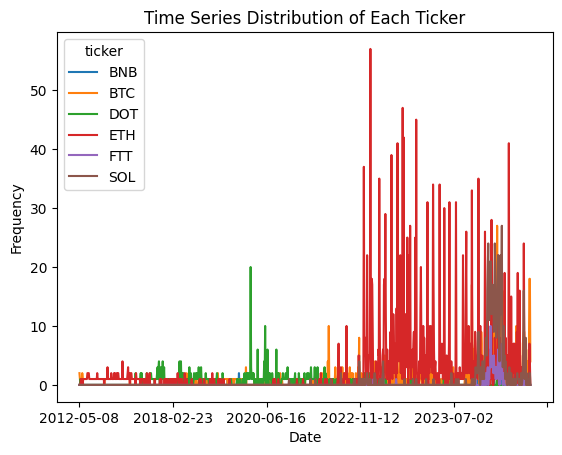

In [15]:
df_grouped2 = df_filtered2.groupby(['ticker', 'created_at']).size().unstack(fill_value=0)

# 시계열 그래프 그리기
df_grouped2.T.plot(kind='line') # 'bar'는 막대 그래프, 'line'은 선 그래프
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Time Series Distribution of Each Ticker')
plt.show()

In [16]:
pd.set_option('display.max_rows', 15)  # 모든 행을 출력하도록 설정
date_counts = df_filtered2['created_at'].value_counts()
date_counts

created_at
2023-10-26    65
2022-12-08    59
2023-11-03    58
2023-08-31    55
2023-10-12    51
              ..
2018-10-13     1
2018-10-01     1
2018-09-20     1
2018-08-15     1
2018-08-14     1
Name: count, Length: 965, dtype: int64

#### 2023 9.30 ~ 2023. 12.31 (3개월) 기간의 데이터 확인

시계열 데이터의 개수 총합: 1734
ticker
SOL    635
BTC    485
ETH    397
FTT    114
BNB     98
DOT      5
Name: count, dtype: int64


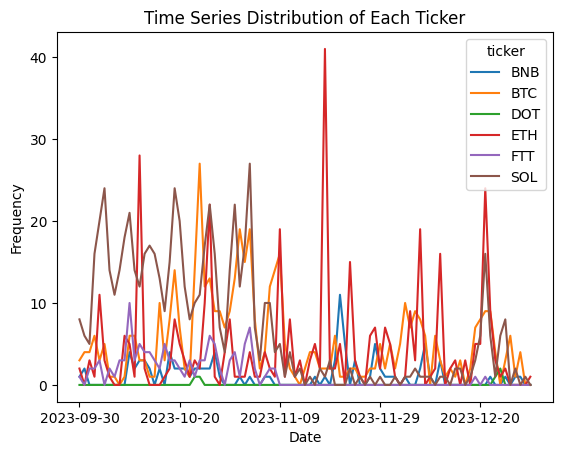

In [33]:
start_date = '2023-09-30'
end_date = '2023-12-31'
filtered_df3 = df_filtered2[(df['created_at'] >= start_date) & (df_filtered2['created_at'] <= end_date)]
filtered_df3.reset_index(drop=True, inplace=True)
abc = filtered_df3['ticker'].value_counts()

print(f"시계열 데이터의 개수 총합: {len(filtered_df3)}")
print(abc)

df_grouped3 = filtered_df3.groupby(['ticker', 'created_at']).size().unstack(fill_value=0)

# 시계열 그래프 그리기
df_grouped3.T.plot(kind='line') # 'bar'는 막대 그래프, 'line'은 선 그래프
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Time Series Distribution of Each Ticker')
plt.show()
# 결과 출력

#### 시계열 3개월 단위 분석

In [34]:
end_date = pd.to_datetime('2023-12-31')
# 'created_at' 컬럼을 날짜/시간 타입으로 변환
df_filtered2['created_at'] = pd.to_datetime(df_filtered2['created_at'])


시계열 데이터의 개수 총합 (2023-10-01 to 2023-12-31): 1719
ticker
SOL    627
BTC    482
ETH    395
FTT    113
BNB     97
DOT      5
Name: count, dtype: int64


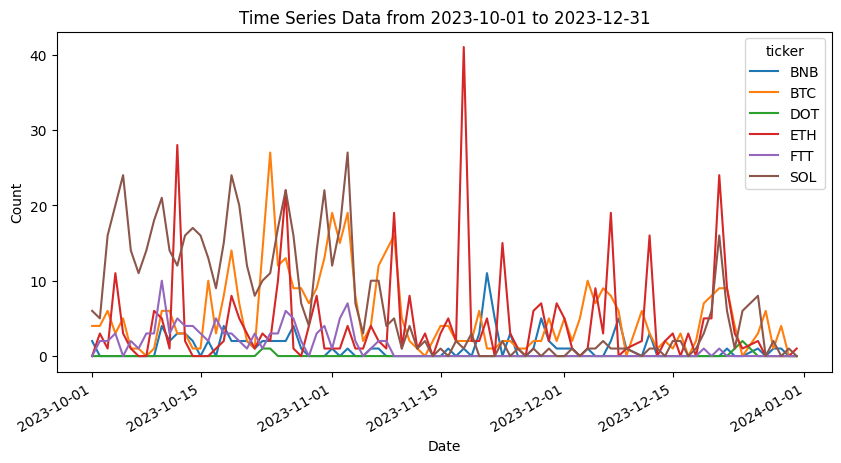

시계열 데이터의 개수 총합 (2023-07-01 to 2023-09-30): 633
ticker
ETH    361
BTC    153
SOL     74
BNB     35
FTT      9
DOT      1
Name: count, dtype: int64


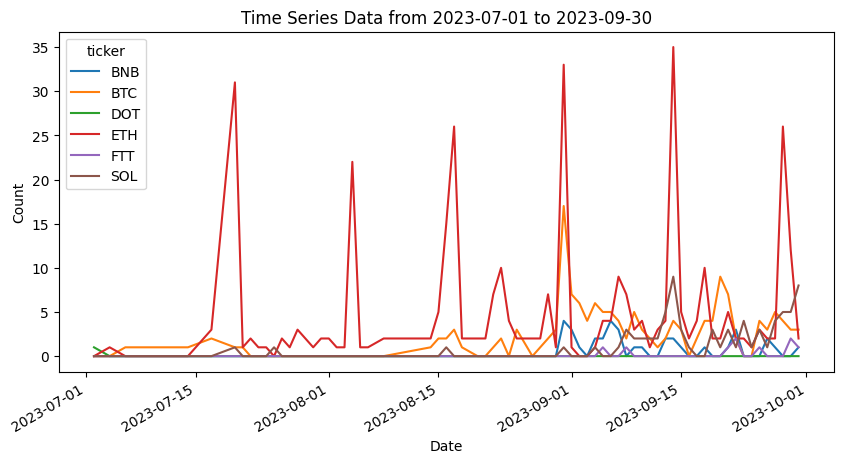

시계열 데이터의 개수 총합 (2023-03-31 to 2023-06-30): 497
ticker
ETH    420
BTC     65
SOL      5
DOT      4
BNB      3
Name: count, dtype: int64


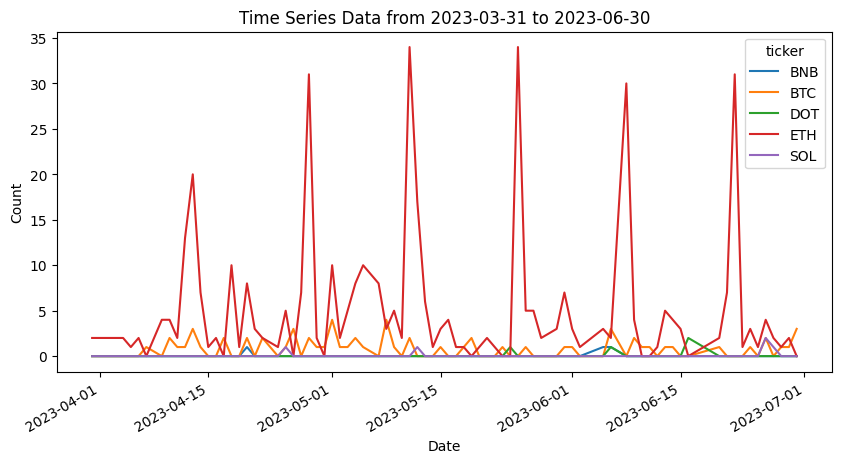

시계열 데이터의 개수 총합 (2023-01-01 to 2023-03-31): 897
ticker
ETH    779
BTC     97
SOL     10
DOT      5
BNB      3
FTT      3
Name: count, dtype: int64


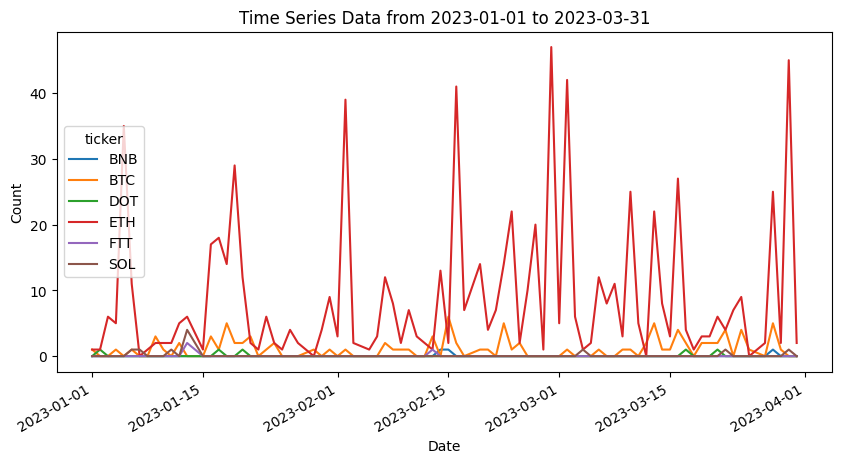

시계열 데이터의 개수 총합 (2022-10-01 to 2022-12-31): 343
ticker
ETH    235
BTC     59
SOL     21
DOT     14
BNB     11
FTT      3
Name: count, dtype: int64


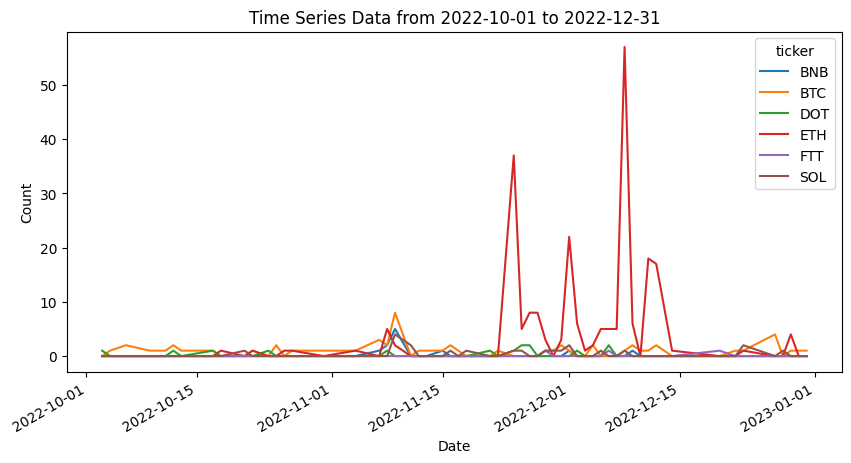

시계열 데이터의 개수 총합 (2022-07-01 to 2022-09-30): 82
ticker
BTC    39
ETH    34
DOT     6
SOL     2
BNB     1
Name: count, dtype: int64


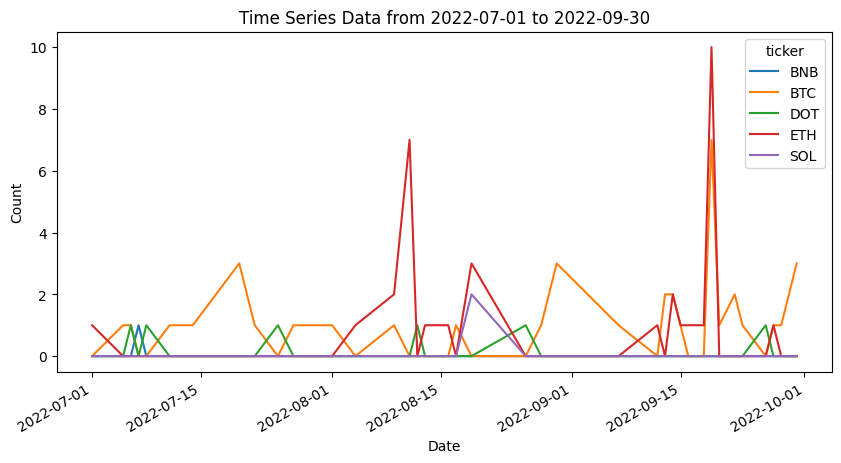

시계열 데이터의 개수 총합 (2022-03-31 to 2022-06-30): 47
ticker
BTC    28
DOT    13
ETH     5
SOL     1
Name: count, dtype: int64


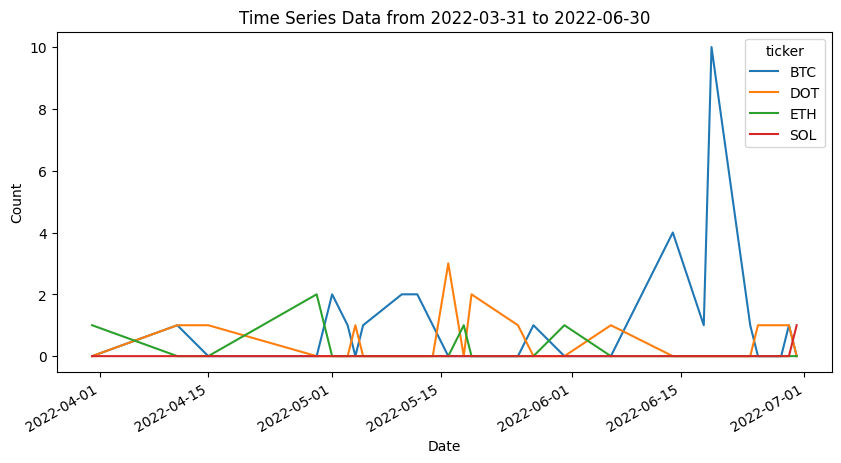

시계열 데이터의 개수 총합 (2022-01-01 to 2022-03-31): 33
ticker
DOT    27
BTC     3
SOL     2
ETH     1
Name: count, dtype: int64


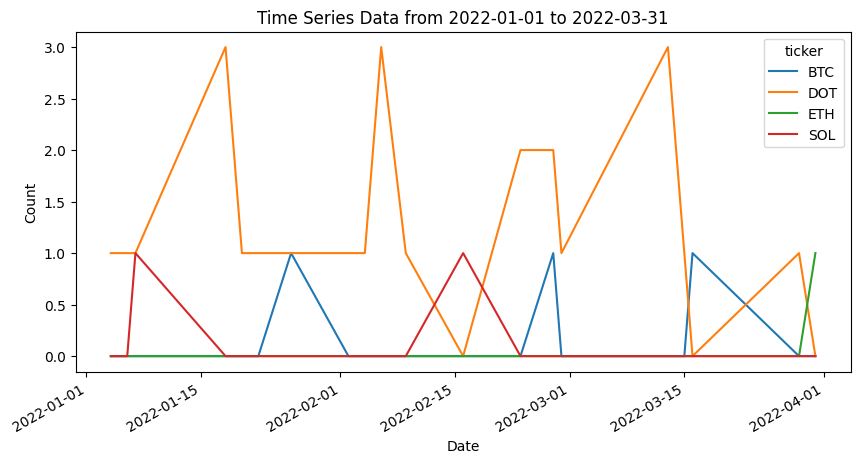

시계열 데이터의 개수 총합 (2021-10-01 to 2021-12-31): 18
ticker
DOT    16
ETH     1
BTC     1
Name: count, dtype: int64


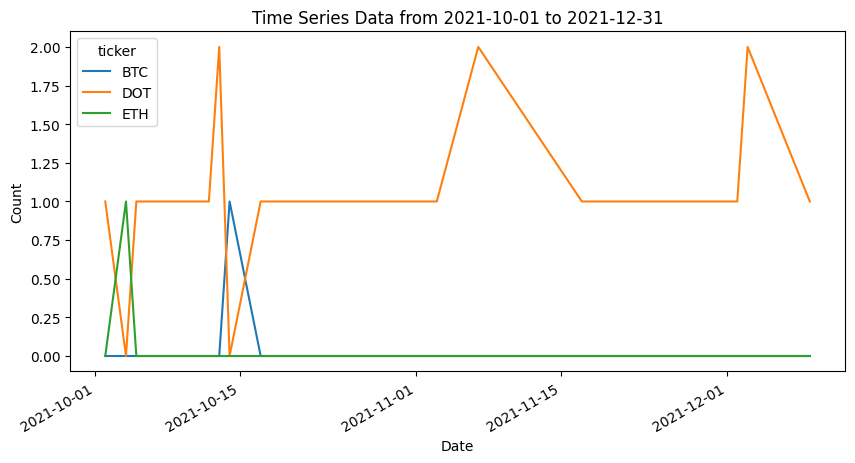

시계열 데이터의 개수 총합 (2021-07-01 to 2021-09-30): 15
ticker
DOT    9
BTC    4
BNB    1
ETH    1
Name: count, dtype: int64


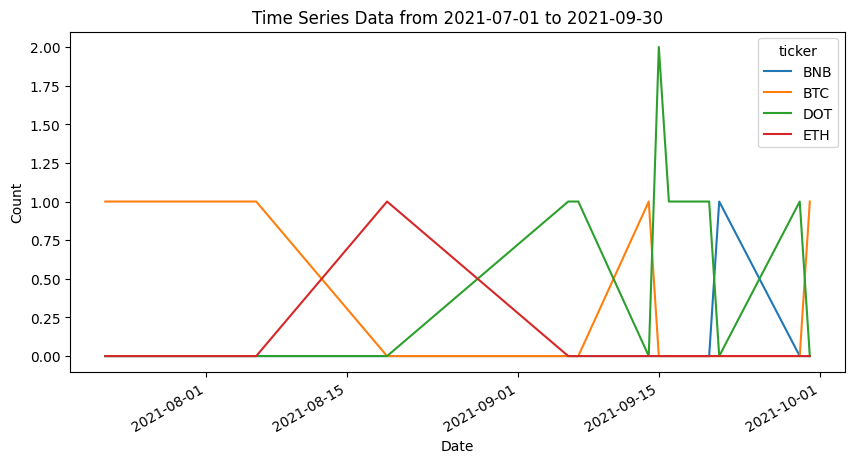

시계열 데이터의 개수 총합 (2021-03-31 to 2021-06-30): 7
ticker
DOT    4
BTC    3
Name: count, dtype: int64


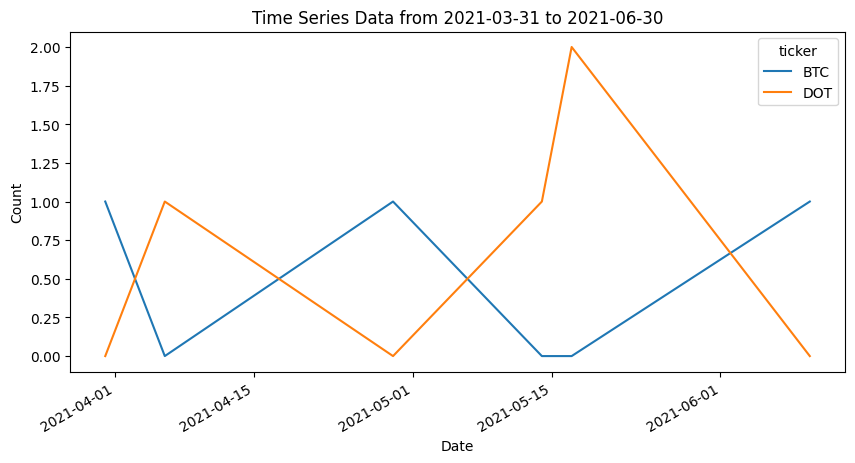

시계열 데이터의 개수 총합 (2021-01-01 to 2021-03-31): 20
ticker
DOT    16
BTC     3
SOL     1
Name: count, dtype: int64


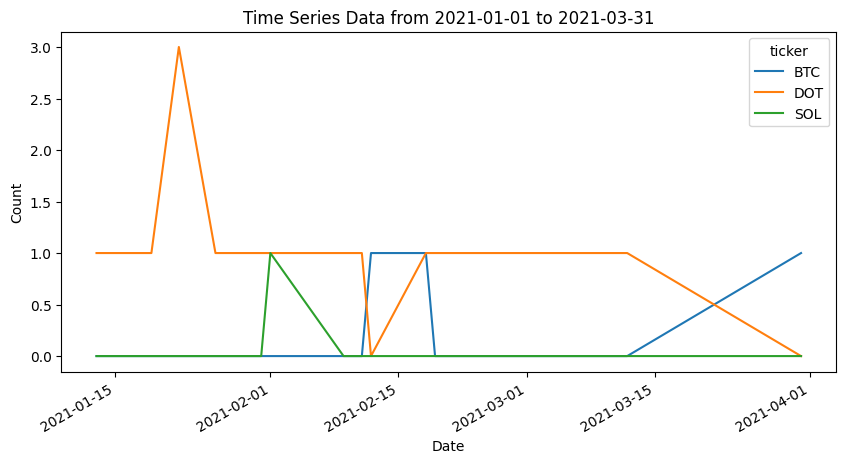

시계열 데이터의 개수 총합 (2020-10-01 to 2020-12-31): 6
ticker
DOT    6
Name: count, dtype: int64


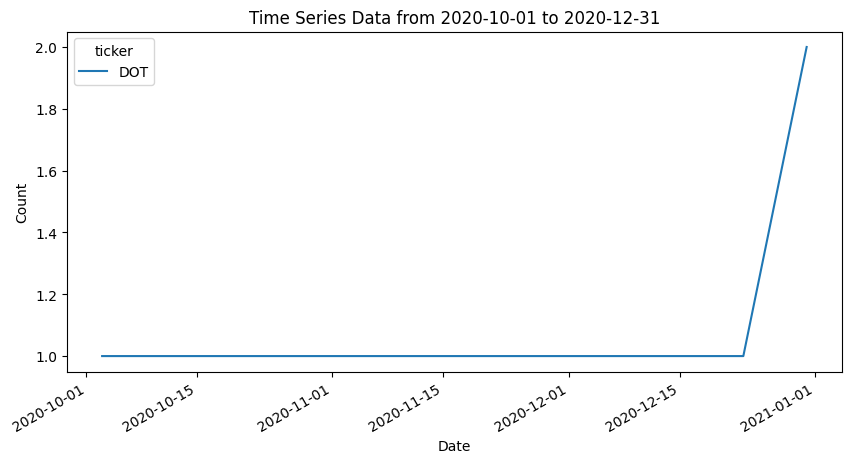

시계열 데이터의 개수 총합 (2020-07-01 to 2020-09-30): 47
ticker
DOT    29
BTC    15
ETH     3
Name: count, dtype: int64


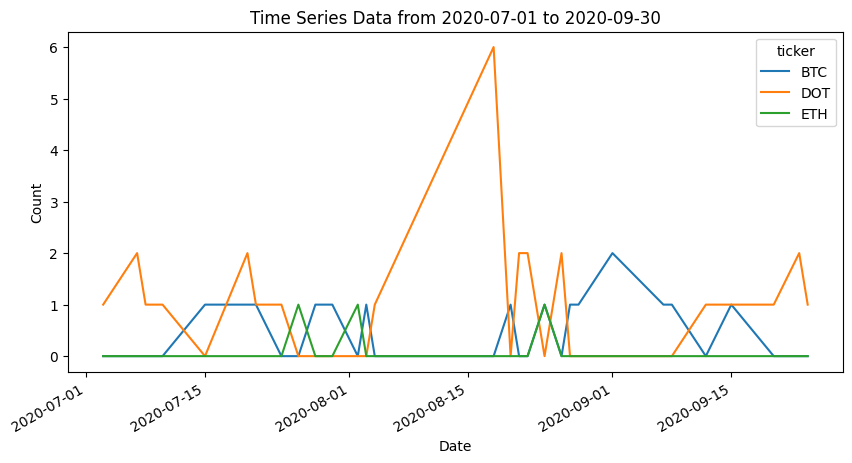

시계열 데이터의 개수 총합 (2020-03-31 to 2020-06-30): 50
ticker
DOT    38
BTC    12
Name: count, dtype: int64


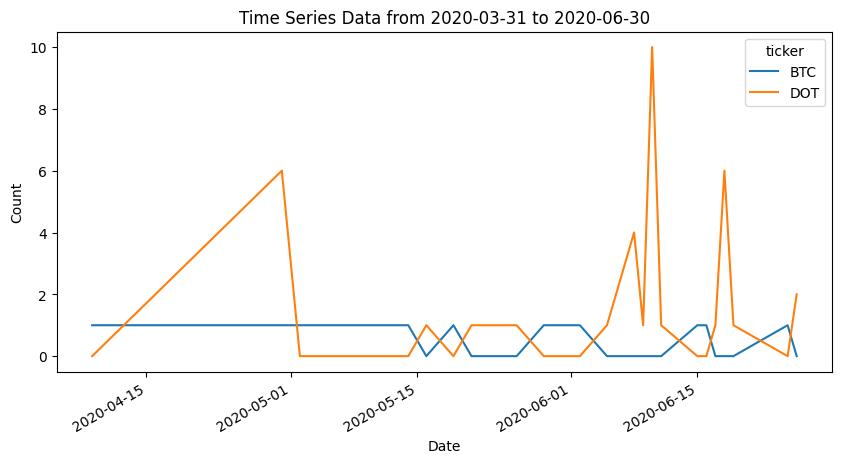

시계열 데이터의 개수 총합 (2020-01-01 to 2020-03-31): 15
ticker
DOT    10
BTC     5
Name: count, dtype: int64


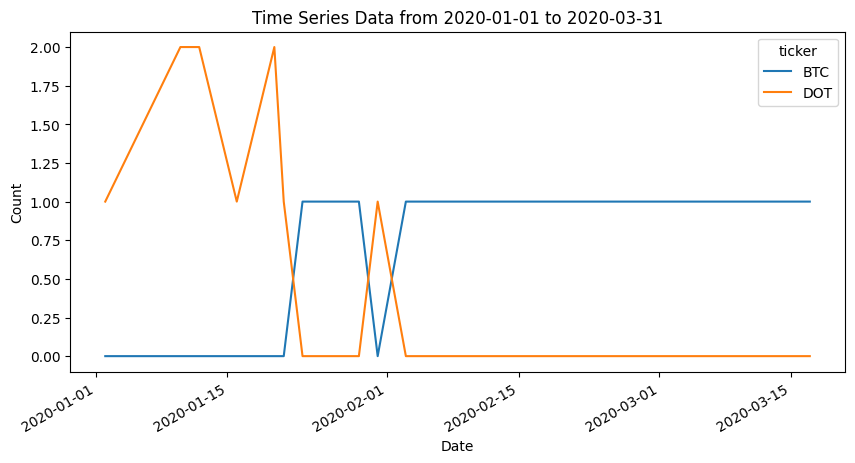

시계열 데이터의 개수 총합 (2019-10-01 to 2019-12-31): 48
ticker
DOT    41
BTC     7
Name: count, dtype: int64


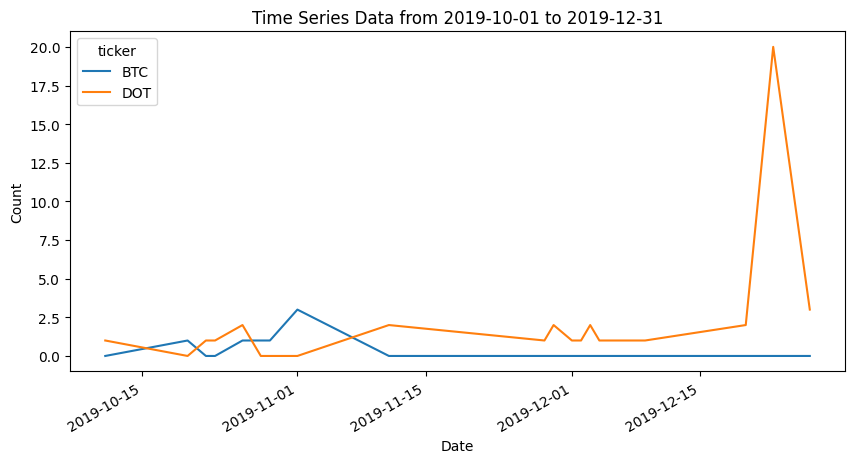

시계열 데이터의 개수 총합 (2019-07-01 to 2019-09-30): 17
ticker
BTC    10
DOT     4
BNB     3
Name: count, dtype: int64


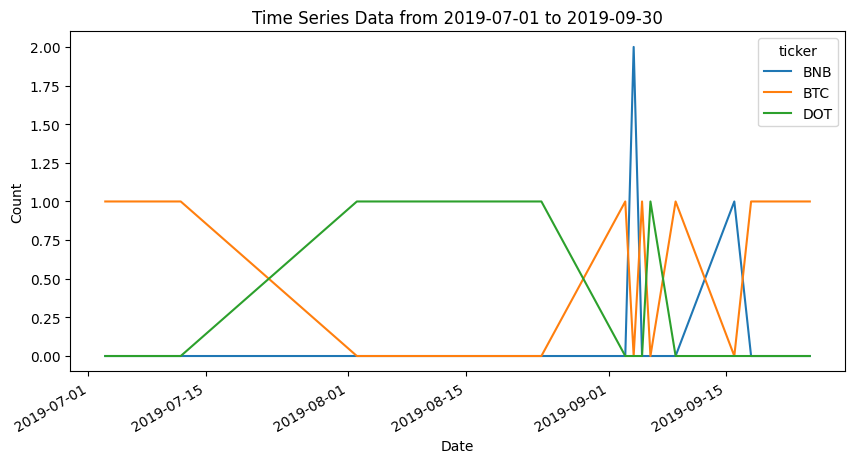

시계열 데이터의 개수 총합 (2019-03-31 to 2019-06-30): 22
ticker
BTC    18
BNB     2
DOT     1
ETH     1
Name: count, dtype: int64


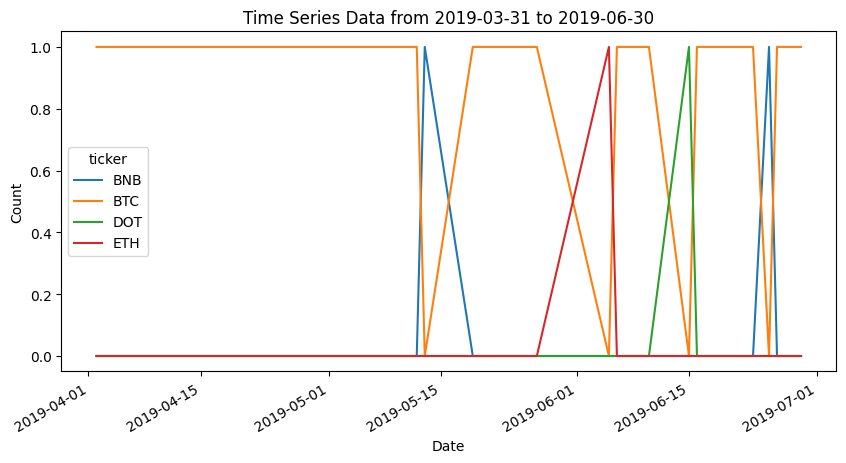

시계열 데이터의 개수 총합 (2019-01-01 to 2019-03-31): 20
ticker
BTC    11
DOT     5
ETH     4
Name: count, dtype: int64


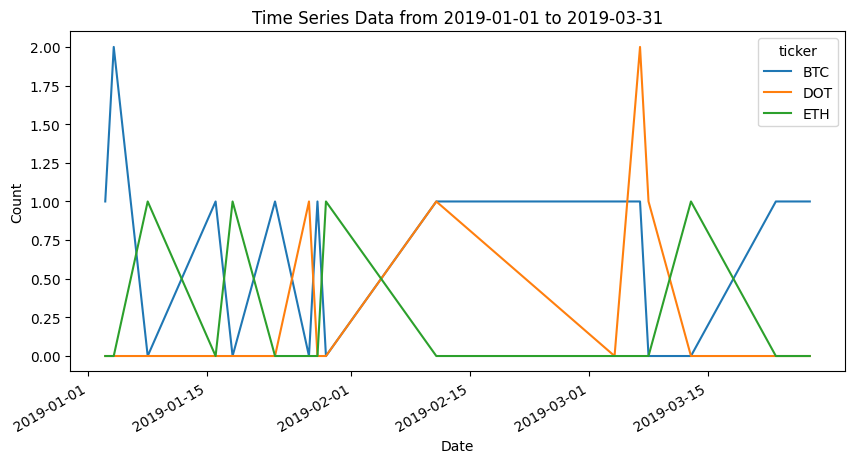

시계열 데이터의 개수 총합 (2018-10-01 to 2018-12-31): 18
ticker
BTC    9
DOT    5
ETH    4
Name: count, dtype: int64


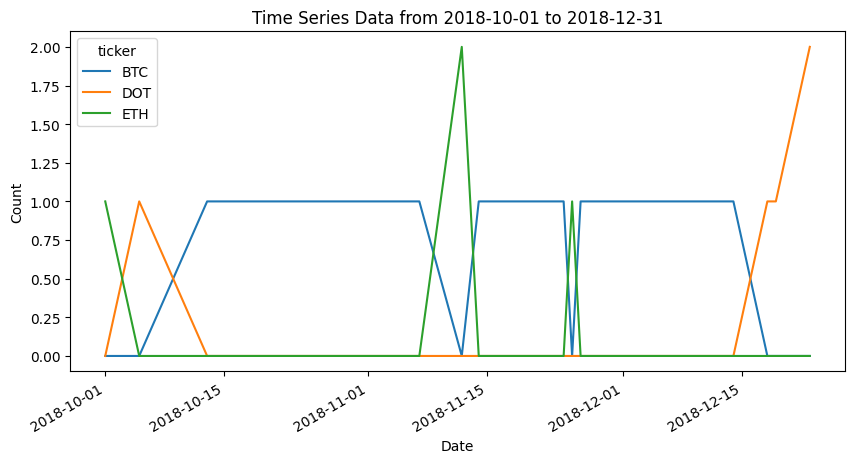

시계열 데이터의 개수 총합 (2018-07-01 to 2018-09-30): 43
ticker
DOT    32
BTC     7
ETH     4
Name: count, dtype: int64


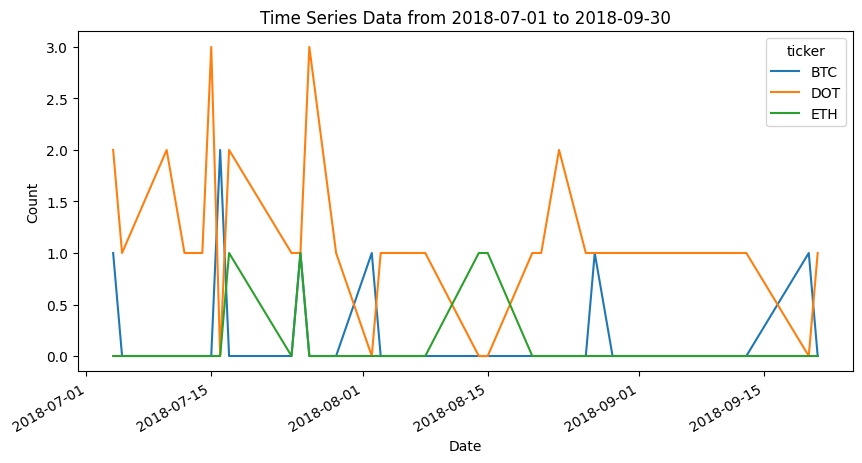

시계열 데이터의 개수 총합 (2018-03-31 to 2018-06-30): 65
ticker
DOT    46
ETH    10
BTC     9
Name: count, dtype: int64


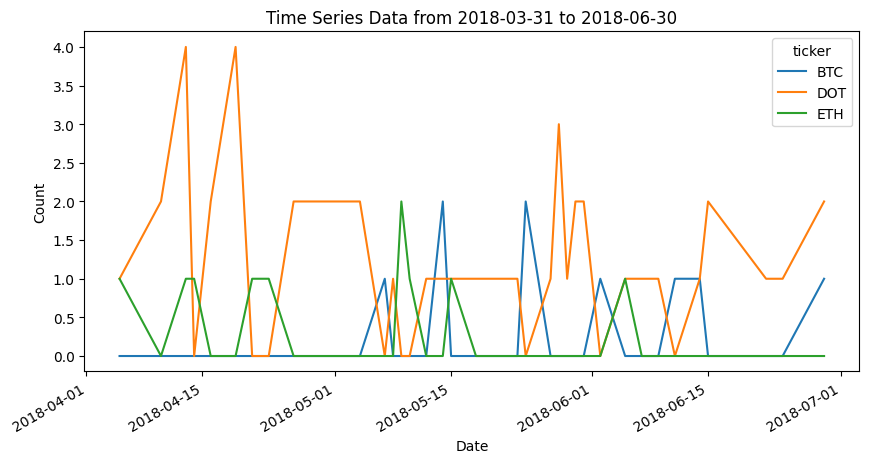

시계열 데이터의 개수 총합 (2018-01-01 to 2018-03-31): 20
ticker
ETH    11
DOT     9
Name: count, dtype: int64


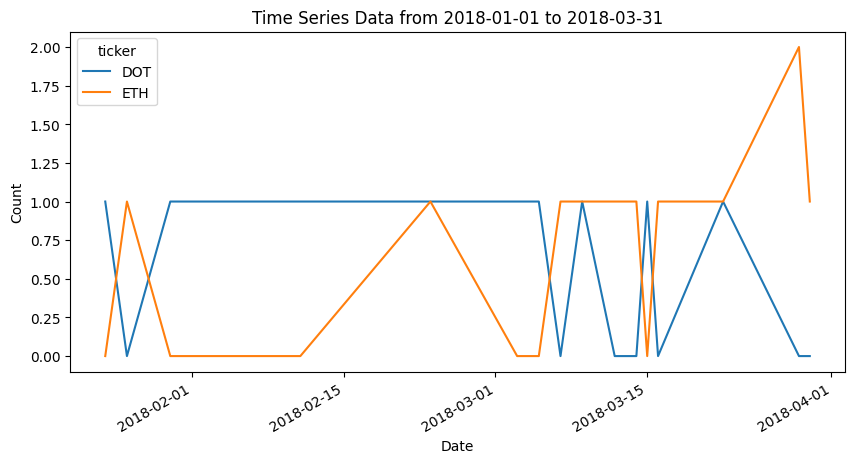

시계열 데이터의 개수 총합 (2017-10-01 to 2017-12-31): 41
ticker
DOT    32
ETH     8
BTC     1
Name: count, dtype: int64


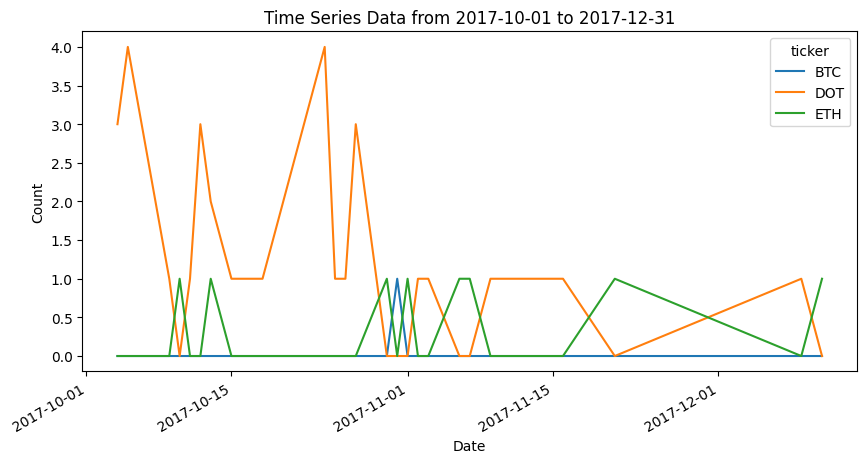

시계열 데이터의 개수 총합 (2017-07-01 to 2017-09-30): 37
ticker
DOT    28
ETH     9
Name: count, dtype: int64


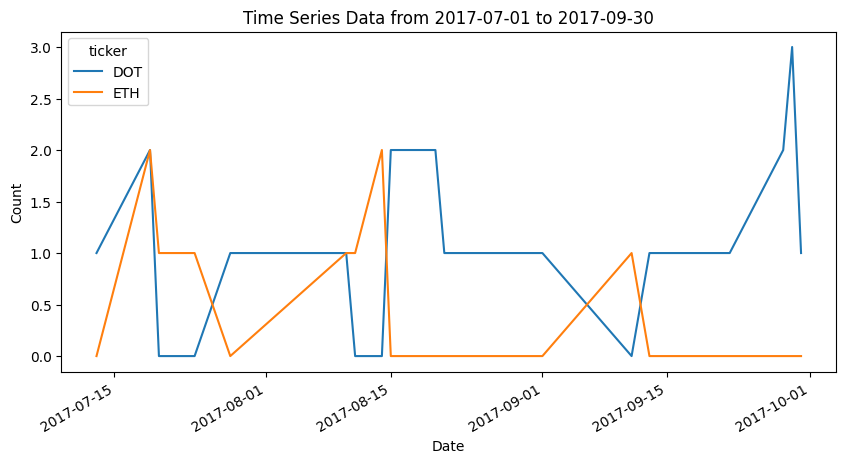

시계열 데이터의 개수 총합 (2017-03-31 to 2017-06-30): 3
ticker
ETH    3
Name: count, dtype: int64


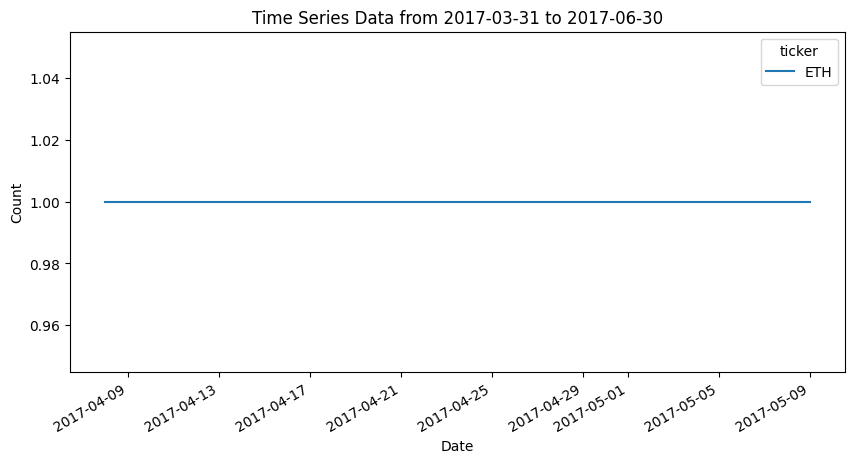

시계열 데이터의 개수 총합 (2017-01-01 to 2017-03-31): 15
ticker
DOT    7
ETH    7
BTC    1
Name: count, dtype: int64


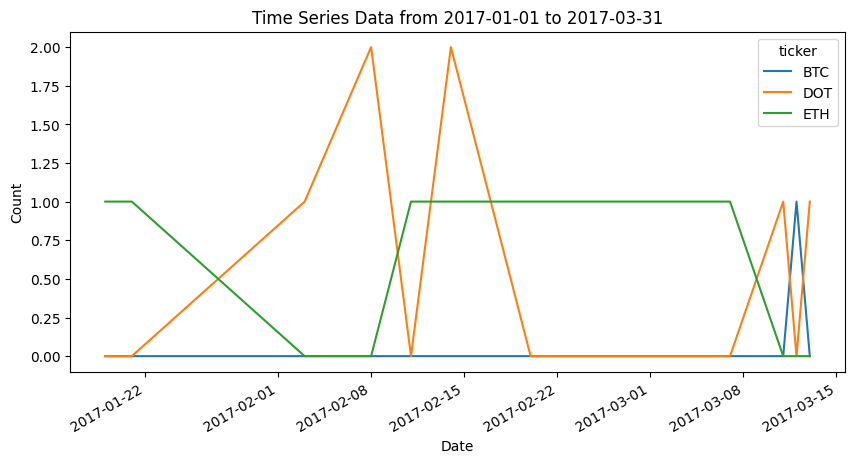

시계열 데이터의 개수 총합 (2016-10-01 to 2016-12-31): 26
ticker
ETH    23
DOT     2
BTC     1
Name: count, dtype: int64


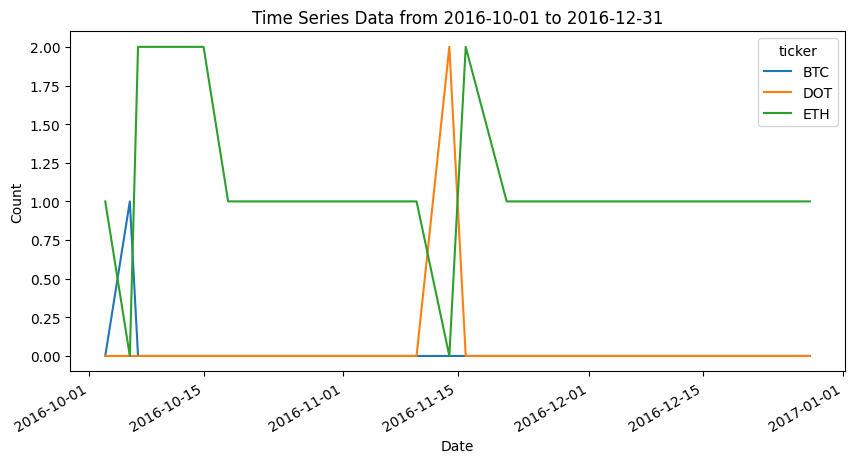

시계열 데이터의 개수 총합 (2016-07-01 to 2016-09-30): 24
ticker
ETH    24
Name: count, dtype: int64


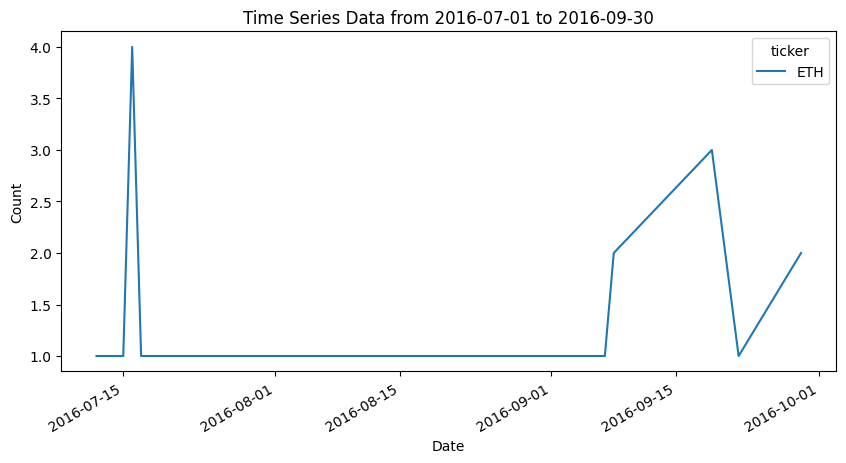

시계열 데이터의 개수 총합 (2016-03-31 to 2016-06-30): 25
ticker
ETH    25
Name: count, dtype: int64


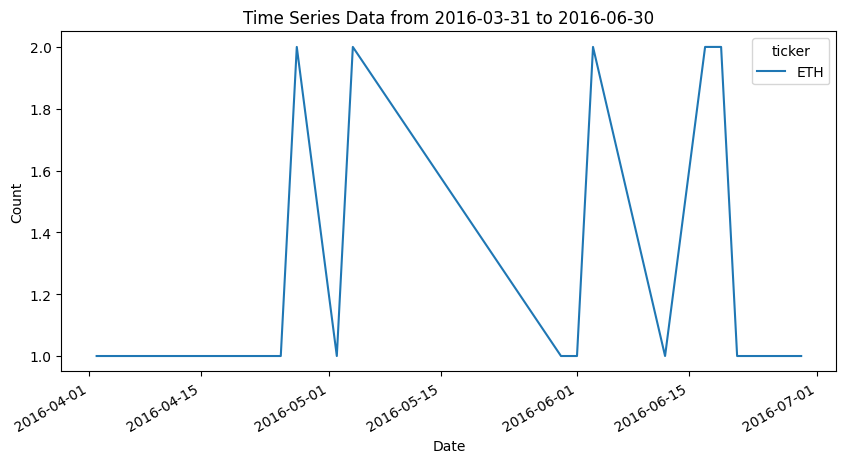

시계열 데이터의 개수 총합 (2016-01-01 to 2016-03-31): 19
ticker
ETH    19
Name: count, dtype: int64


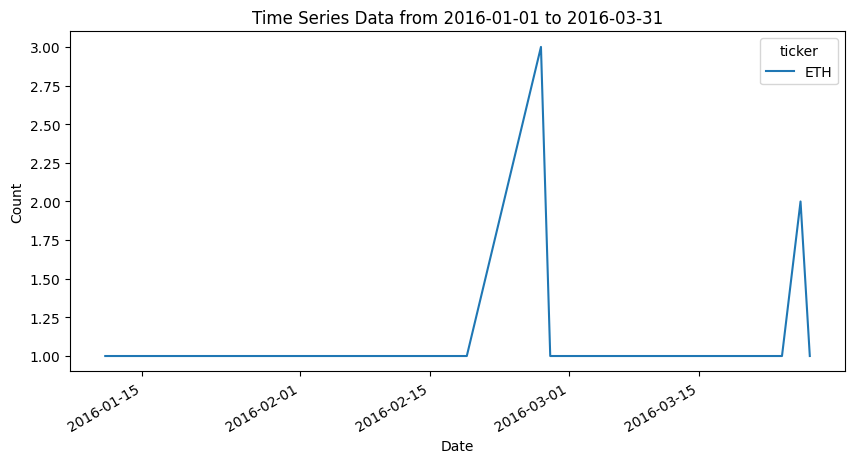

시계열 데이터의 개수 총합 (2015-10-01 to 2015-12-31): 21
ticker
ETH    20
BTC     1
Name: count, dtype: int64


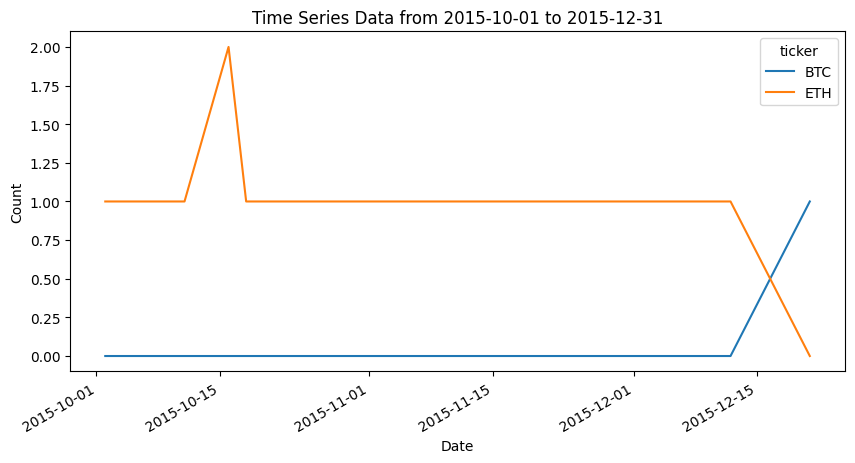

시계열 데이터의 개수 총합 (2015-07-01 to 2015-09-30): 9
ticker
ETH    9
Name: count, dtype: int64


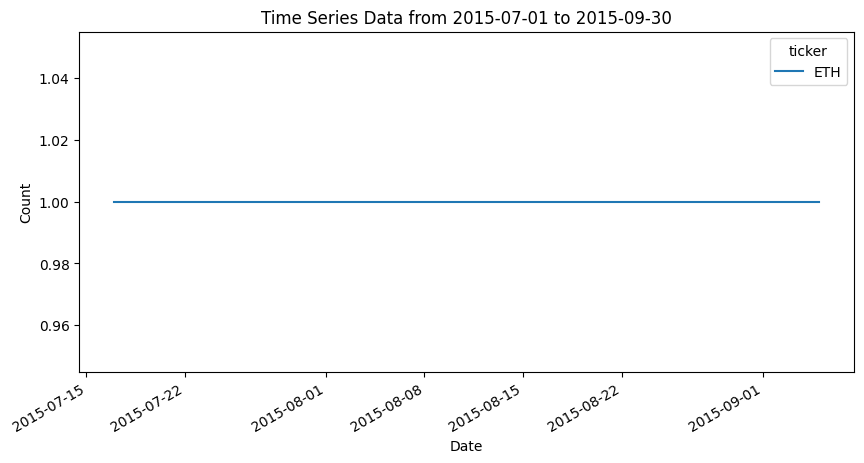

시계열 데이터의 개수 총합 (2015-03-31 to 2015-06-30): 14
ticker
ETH    14
Name: count, dtype: int64


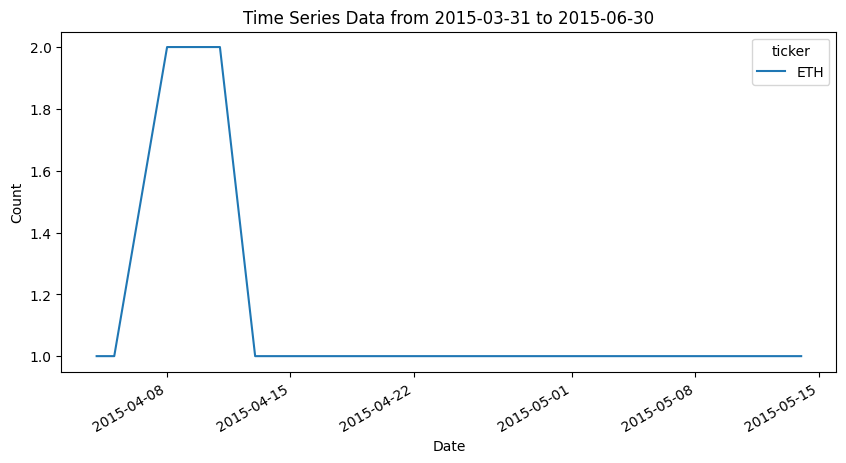

시계열 데이터의 개수 총합 (2015-01-01 to 2015-03-31): 3
ticker
ETH    3
Name: count, dtype: int64


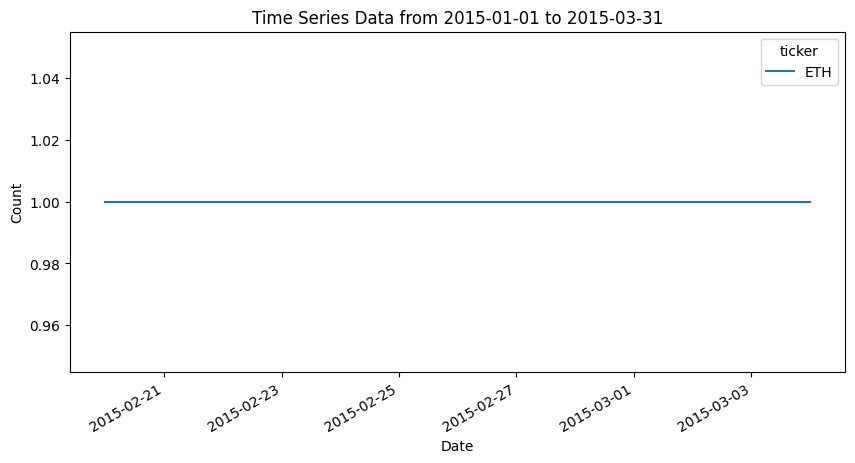

시계열 데이터의 개수 총합 (2014-10-01 to 2014-12-31): 4
ticker
ETH    4
Name: count, dtype: int64


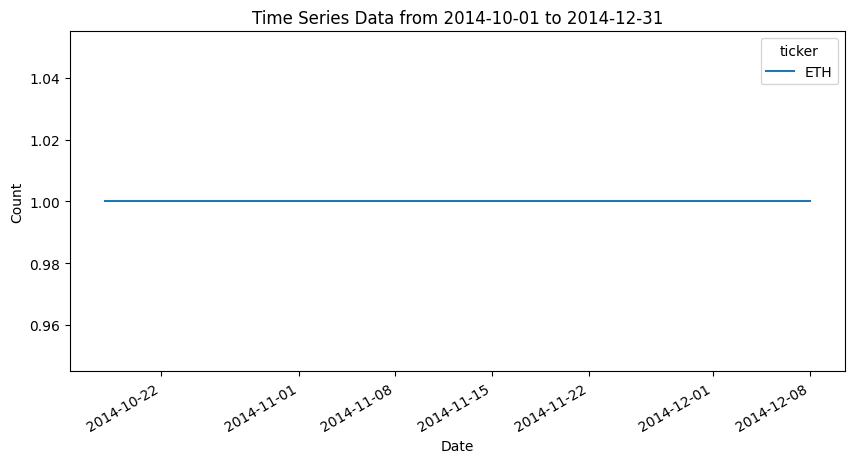

시계열 데이터의 개수 총합 (2014-07-01 to 2014-09-30): 4
ticker
BTC    3
ETH    1
Name: count, dtype: int64


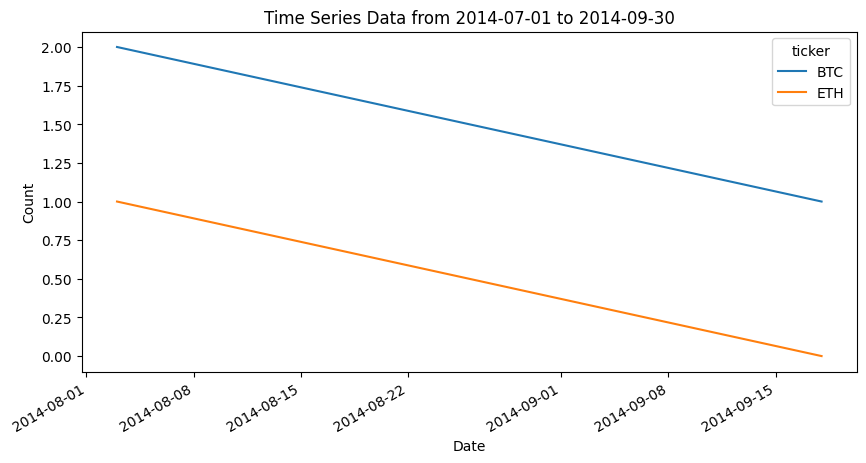

시계열 데이터의 개수 총합 (2014-03-31 to 2014-06-30): 4
ticker
ETH    3
DOT    1
Name: count, dtype: int64


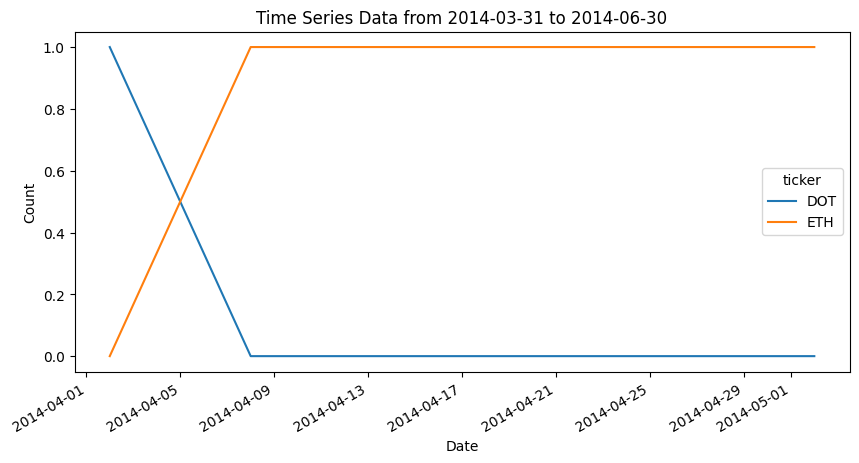

In [53]:
def process_and_plot_data(df, start, end):
    filtered_df = df[(df['created_at'] >= start) & (df['created_at'] <= end)]
    filtered_df.reset_index(drop=True, inplace=True)
    ticker_counts = filtered_df['ticker'].value_counts()
    print(f"시계열 데이터의 개수 총합 ({start.strftime('%Y-%m-%d')} to {end.strftime('%Y-%m-%d')}): {len(filtered_df)}")
    print(ticker_counts)
    df_grouped = filtered_df.groupby(['ticker', 'created_at']).size().unstack(fill_value=0)
    ax = df_grouped.T.plot(kind='line', figsize=(10, 5), title=f"Time Series Data from {start.strftime('%Y-%m-%d')} to {end.strftime('%Y-%m-%d')}")
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    plt.show()


for period in range(39):
    period_end = end_date - pd.DateOffset(months=3 * period)
    period_start = period_end - pd.DateOffset(months=3) + pd.DateOffset(days=1)
    process_and_plot_data(df_filtered2, period_start, period_end)

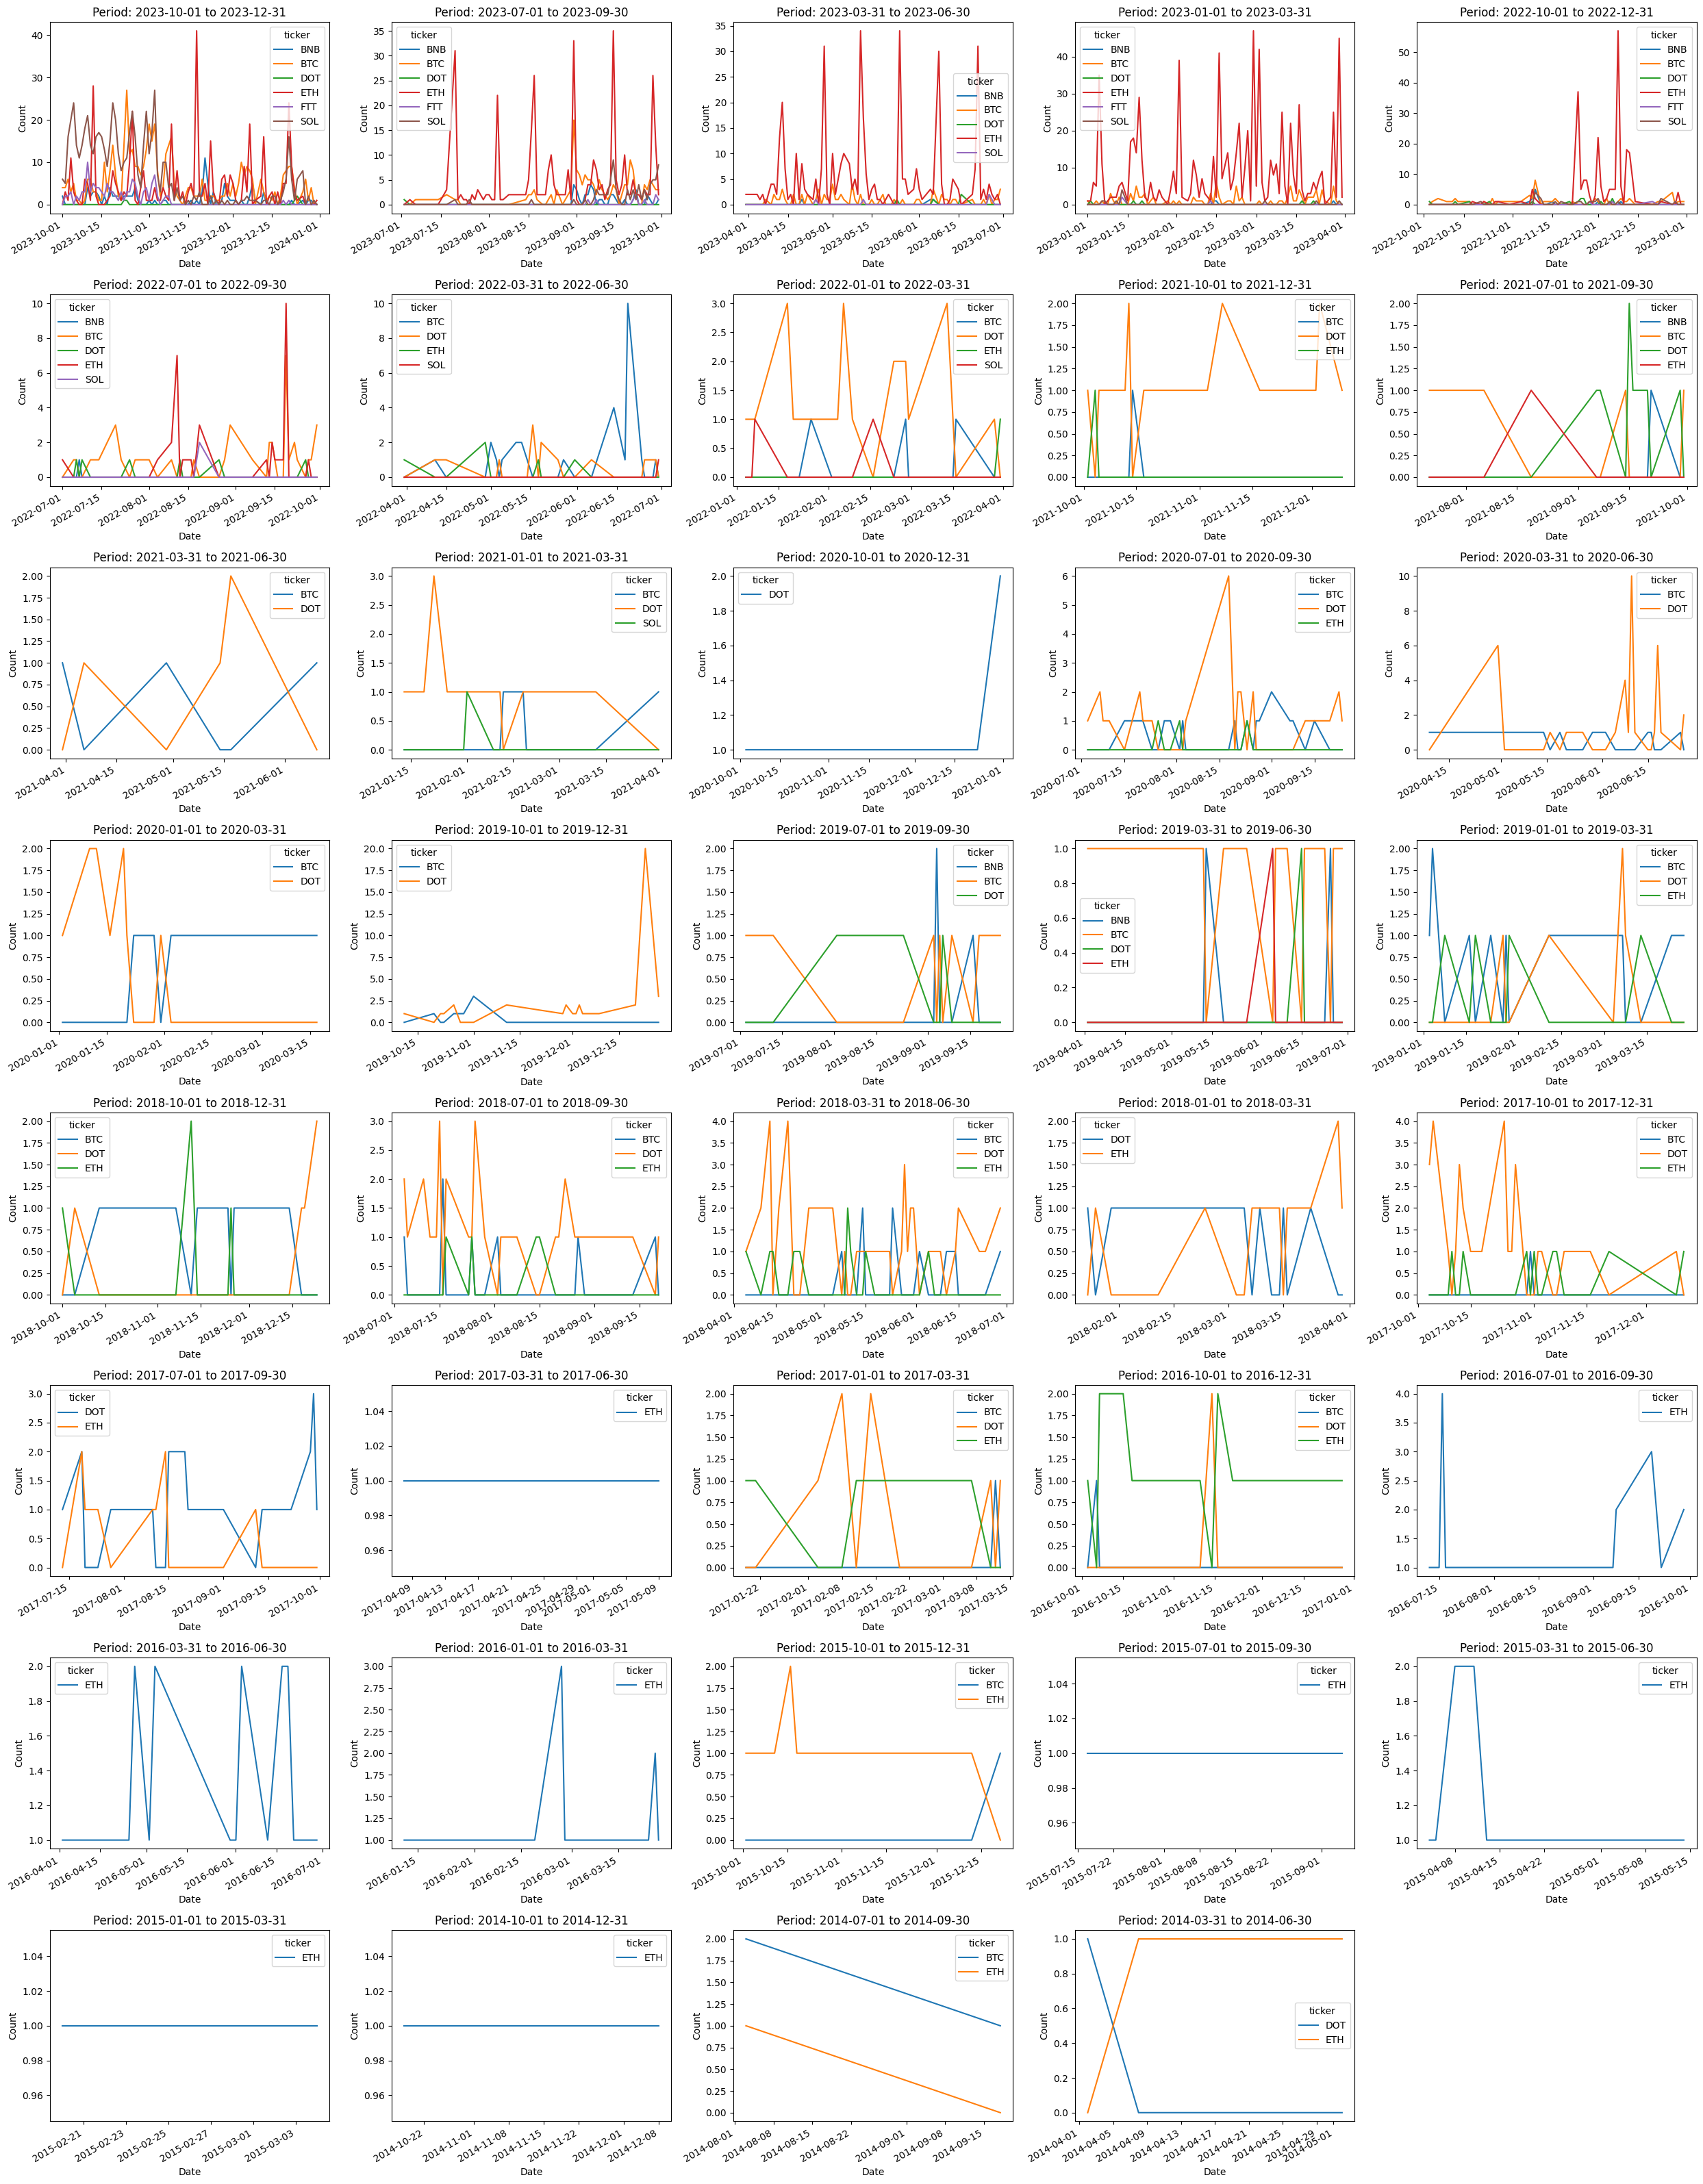

In [52]:
total_periods = 39
rows = (total_periods + 4) // 5  # 컬럼이 5개이므로

# 새로운 5개 컬럼의 서브플롯 그리드 생성
fig, axes = plt.subplots(nrows=rows, ncols=5, figsize=(25, 4 * rows))

for period in range(total_periods):
    # 각 기간의 시작과 끝 날짜 계산
    period_end = end_date - pd.DateOffset(months=3 * period)
    period_start = period_end - pd.DateOffset(months=3) + pd.DateOffset(days=1)

    # 데이터 필터링
    filtered_df = df_filtered2[(df_filtered2['created_at'] >= period_start) & (df_filtered2['created_at'] <= period_end)]
    df_grouped = filtered_df.groupby(['ticker', 'created_at']).size().unstack(fill_value=0)

    # 서브플롯 위치 계산
    row = period // 5
    col = period % 5

    # 그래프 그리기
    df_grouped.T.plot(kind='line', ax=axes[row, col], title=f"Period: {period_start.strftime('%Y-%m-%d')} to {period_end.strftime('%Y-%m-%d')}")
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Count')

# 남은 빈 서브플롯 숨기기
for i in range(period + 1, rows * 5):
    fig.delaxes(axes[i // 5, i % 5])

# 레이아웃 조정
plt.tight_layout()
plt.show()